# Part A
### DOMAIN: Telecom
### CONTEXT: 
A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.
### DATA DESCRIPTION: 
Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

### PROJECT OBJECTIVE: 
To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

# STEPS AND TASK

# 1. Data Understanding & Exploration:

## A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.


In [253]:
# Import Libraries for Data Pre-processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
print("Libraries imported successfully!")

Libraries imported successfully!


In [254]:
# Import CSV file
df1 = pd.read_csv(r"TelcomCustomer-Churn_1.csv")
# Show imported dataframe head
df1.isnull().sum()

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
dtype: int64

## B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [255]:
# Import CSV file
df2 = pd.read_csv(r"TelcomCustomer-Churn_2.csv")
# Show imported dataframe head
df2.isnull().sum()

customerID          0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame 

In [256]:
# Merge df1 and df2 to single dataframe named customer_data
customer_data = pd.merge(df1,df2,on='customerID')
# Show merged dataframe
customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [257]:
# Column names in df1
df1_columns = list(df1.columns)
df1_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity']

In [258]:
# Column names in df2
df2_columns = list(df2.columns)
# Remove 'customerID' from the list as it is repeated
del df2_columns[0]
df2_columns

['OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [259]:
# Combine columns from both dataframes
all_columns = df1_columns + df2_columns
all_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [260]:
# Column names in customer_data
customer_data_columns = list(customer_data.columns)
customer_data_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [261]:
# Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.
if customer_data_columns == all_columns:
    print("All Columns Incorporated!")
else:
    print("Some columns are missing.")

All Columns Incorporated!


# 2. Data Cleaning & Analysis:
## A. Impute missing/unexpected values in the DataFrame.

In [262]:
# Check datatype of all columns
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [263]:
# Replace empty places with NaN
customer_data = customer_data.replace(' ',np.nan)
# Check for missing values in the merged dataframe
customer_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [264]:
# There are 11 empty values in the column 'TotalCharges'
# Check for different unexpected categories in other columns
for col in customer_data.columns:
    temp = customer_data[col].value_counts()
    print(temp)

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

In [265]:
# Drop empty values from the dataframe
customer_data = customer_data.dropna(axis=0).reset_index()
customer_data.isnull().sum()

index               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [266]:
columns1=[]
for feature in customer_data.columns:
   columns1.append(feature) 
columns1

['index',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

## 2. Make sure all the variables with continuous values are of ‘Float’ type. [For Example: MonthlyCharges, TotalCharges]

In [267]:
# First, let's convert the columns with an 'object' datatype into categorical variables
for feature in customer_data.columns: # Loop through all columns in the dataframe
    if customer_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        customer_data[feature] = pd.Categorical(customer_data[feature])# Replace strings with an integer
customer_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [268]:
# 'SeniorCitizen' is also a category. Let's change it.
customer_data['SeniorCitizen'] = pd.Categorical(customer_data.SeniorCitizen)
customer_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [269]:
# Change datatype of 'TotalCharges' to float
customer_data.TotalCharges = customer_data.TotalCharges.astype(float)
customer_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

## C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Pie Chart for  customerID  is unavailable due high number of Unique Values 


Pie Chart for:  gender


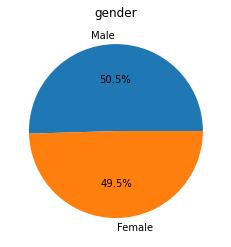

Pie Chart for:  SeniorCitizen


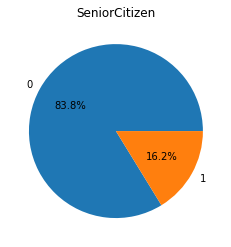

Pie Chart for:  Partner


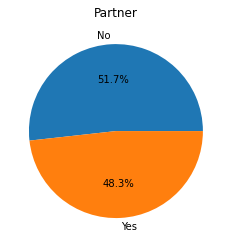

Pie Chart for:  Dependents


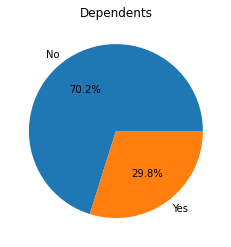

Pie Chart for:  PhoneService


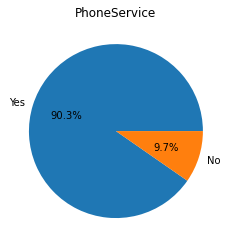

Pie Chart for:  MultipleLines


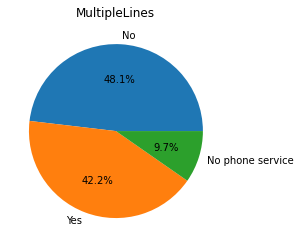

Pie Chart for:  InternetService


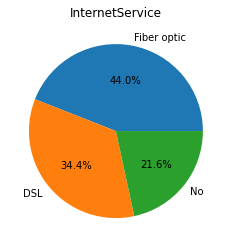

Pie Chart for:  OnlineSecurity


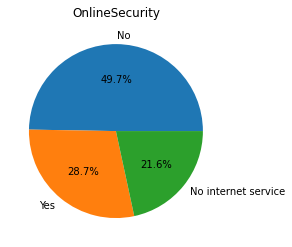

Pie Chart for:  OnlineBackup


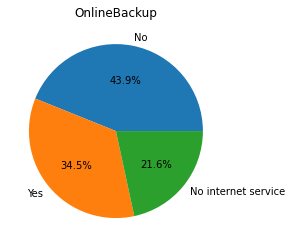

Pie Chart for:  DeviceProtection


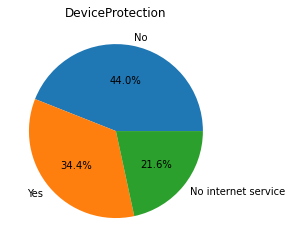

Pie Chart for:  TechSupport


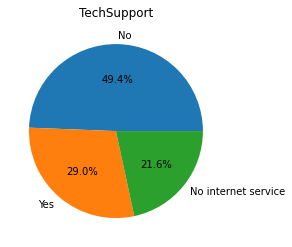

Pie Chart for:  StreamingTV


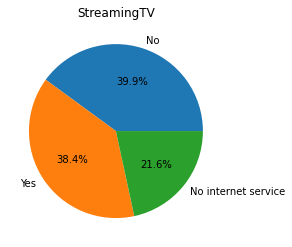

Pie Chart for:  StreamingMovies


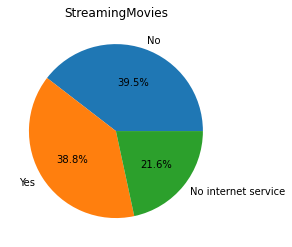

Pie Chart for:  Contract


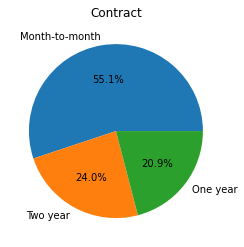

Pie Chart for:  PaperlessBilling


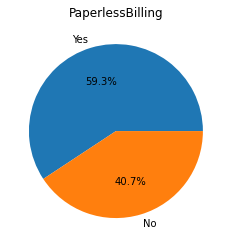

Pie Chart for:  PaymentMethod


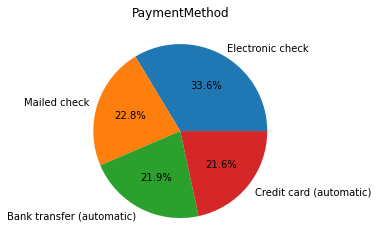

Pie Chart for:  Churn


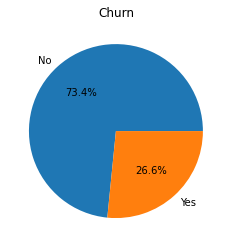

In [270]:
def pie_chart_for_categorical_variables_in_df(df,threshold):
  categorical_features = df.select_dtypes(['object','category']).columns.to_list()
  print(categorical_features)
  dropna = False
  for cat_feature in categorical_features: 
      num_unique = df[cat_feature].nunique(dropna = dropna)
      if num_unique <= threshold:
          chart_data = df[cat_feature].value_counts(dropna = dropna)
          chart_values=cat_feature
          chart_names = df[cat_feature].value_counts(dropna = dropna).index
          print('Pie Chart for: ', chart_values)
          plt.pie(chart_data,labels=chart_names,autopct='%1.1f%%')
          plt.title(chart_values)
          plt.show()
      else: 
          print('Pie Chart for ',cat_feature,' is unavailable due high number of Unique Values ')
          print('\n')


pie_chart_for_categorical_variables_in_df(customer_data,30)

## D. Share insights for Q2.c.

1. Gender is almost equally balanced between Male(50.5%) and Female(49.5%)
2. There are lesser senior citizens in the dataset 
3. The precentage of senior citizens in the dataset is 16.2%
4. The Partners category is also equally distributed between those having partners(48.3%) and those not having partners(51.7%)
5. Most people do not have dependents(70.2%) and just 29.8% have dependents
6. 90.3% people have Phone Service and 9.7% do not have phone services
7. Among those having phone service(90.3%), 42.2% have multiple lines and 48.1% have single line 
8. 44% people have Fiber optic internet service
9. 49.7% people have Online Security
10. 43.9% people don't have an online backup
11. 49.4% people have no device protection
12. 50% people don't get tech support
13. People streaming TV and not streaming TV are almost equal
14. People streaming movies and not streaming movies are almost equal
15. Maximum people (55.1%) prefer month-to-month contract
16. Maximum people prefer paperless billing(59.3%)
17. 33.6% people prefer electronic checks to make payments. Other payment methods are almost equally distributed
18. Majority (73.4%) people did not churn

## E. Encode all the appropriate Categorical features with the best suitable approach.

In [271]:
# Create a dataframe copy
df = customer_data
df.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [272]:
# Drop 'index' and 'customerID', 'Churn' columns
df.drop(columns=['index', 'customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [273]:
# Independent Variables
X = df.drop(columns=['Churn'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [274]:
# Encode categorical variables
# Using Get Dummies method
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X.head(20)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
5,8,99.65,820.50,0,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
6,22,89.10,1949.40,1,0,0,1,1,0,1,...,0,1,0,0,0,0,1,1,0,0
7,10,29.75,301.90,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,28,104.80,3046.05,0,0,1,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
9,62,56.15,3487.95,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [275]:
# Dependent/Target Variable
Y = df['Churn']
Y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: category
Categories (2, object): ['No', 'Yes']

## F. Split the data into 80% train and 20% test.

In [276]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=.20, random_state=10)

X_train.shape, X_test.shape

((5625, 30), (1407, 30))

## G. Normalize/Standardize the data with the best suitable approach.

In [277]:
# Standardize Training Data
# Import Library
from sklearn.preprocessing import StandardScaler
# Define method
scaler = StandardScaler()
# Perform standardization
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalized_x_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.297499,0.861739,-0.978569,0.980109,-0.443918,-0.967979,1.516285,0.326876,-0.326876,-0.858594,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,-0.561404,0.822862,-0.531223,1.414779,-0.541665
1,-0.521791,0.840135,-0.233205,0.980109,-0.443918,1.033080,1.516285,0.326876,-0.326876,-0.858594,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,-0.561404,0.822862,-0.531223,1.414779,-0.541665
2,1.560372,1.072790,2.036780,0.980109,-0.443918,1.033080,1.516285,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,-0.531223,1.414779,-0.541665
3,1.356239,-1.178976,-0.141853,0.980109,-0.443918,-0.967979,-0.659507,-3.059267,3.059267,-0.858594,...,-0.525166,-0.794595,-0.525166,-0.801159,1.947129,-0.561404,-1.215271,1.882450,-0.706824,-0.541665
4,-0.399311,0.870048,-0.046720,-1.020295,-0.443918,1.033080,1.516285,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,1.882450,-0.706824,-0.541665


In [278]:
# Standardize Test Data
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
normalized_x_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.072697,-1.478104,-0.736393,0.980109,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,1.781249,-1.215271,-0.531223,-0.706824,1.846160
1,1.601199,-1.326878,-0.201081,-1.020295,-0.443918,1.033080,-0.659507,0.326876,-0.326876,1.164695,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,1.781249,-1.215271,1.882450,-0.706824,-0.541665
2,-0.766751,-0.193517,-0.677010,-1.020295,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,-0.525166,-0.794595,-0.525166,1.248191,1.947129,-0.561404,-1.215271,1.882450,-0.706824,-0.541665
3,-0.480964,-1.494722,-0.834621,0.980109,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,-0.561404,0.822862,-0.531223,-0.706824,1.846160
4,1.601199,0.637393,1.691601,-1.020295,2.252668,1.033080,-0.659507,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,1.882450,-0.706824,-0.541665


# 3. Model building and Improvement:
## A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [279]:
# Import XGBoost Library
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(normalized_x_train, y_train)

C:\Users\vikas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vikas\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:39:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

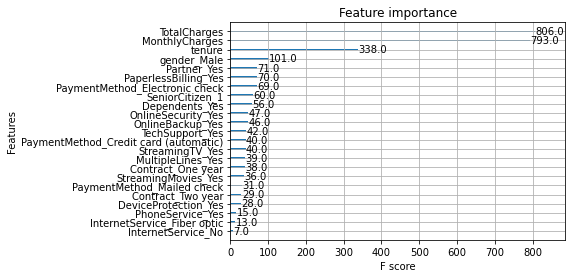

In [280]:
# Feature Importance Plot
xgb.plot_importance(xgb_model);

In [281]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

y_pred = xgb_model.predict(normalized_x_test)

# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[926 120]
 [160 201]]


In [282]:
# predict the target on the train dataset
predict_train = xgb_model.predict(normalized_x_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


Target on train data ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']

accuracy_score on train dataset :  0.9377777777777778


In [283]:
# predict the target on the test dataset
predict_test = xgb_model.predict(normalized_x_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data ['No' 'No' 'No' ... 'No' 'No' 'No']

accuracy_score on test dataset :  0.8009950248756219


## B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

In [284]:
# Early Stopping

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1, eval_metric="auc")

xgb_model.fit(normalized_x_train, y_train, early_stopping_rounds=10, eval_set=[(normalized_x_test, y_test)])

y_pred = xgb_model.predict(normalized_x_test)

accuracy_score(y_test, y_pred)

[0]	validation_0-auc:0.83705
[1]	validation_0-auc:0.84753
[2]	validation_0-auc:0.85023
[3]	validation_0-auc:0.85423
[4]	validation_0-auc:0.85495
[5]	validation_0-auc:0.85637
[6]	validation_0-auc:0.85517
[7]	validation_0-auc:0.85617
[8]	validation_0-auc:0.85564


C:\Users\vikas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vikas\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-auc:0.85580
[10]	validation_0-auc:0.85515
[11]	validation_0-auc:0.85422
[12]	validation_0-auc:0.85310
[13]	validation_0-auc:0.85284
[14]	validation_0-auc:0.85223


0.8088130774697939

In [285]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))

best score: 0.85637, best iteration: 5, best ntree limit 6


In [286]:
# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[924 122]
 [147 214]]


In [287]:
# predict the target on the train dataset
predict_train = xgb_model.predict(normalized_x_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


Target on train data ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']

accuracy_score on train dataset :  0.8183111111111111


In [288]:
# predict the target on the test dataset
predict_test = xgb_model.predict(normalized_x_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data ['No' 'No' 'No' ... 'No' 'No' 'No']

accuracy_score on test dataset :  0.8088130774697939


In [289]:
# Tune XGBoost

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1, 
 learning_rate =0.01,
 n_estimators=100,
 max_depth=4,
 min_child_weight=3,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1)

# Fit the Model
xgb_model.fit(normalized_x_train, y_train)

# predict the target on the train dataset
predict_train = xgb_model.predict(normalized_x_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = xgb_model.predict(normalized_x_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

# Print Confusion Matrix
print(confusion_matrix(y_test, predict_test))

[17:39:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vikas\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



Target on train data ['Yes' 'No' 'No' ... 'No' 'Yes' 'No']

accuracy_score on train dataset :  0.7991111111111111

Target on test data ['No' 'No' 'No' ... 'No' 'No' 'No']

accuracy_score on test dataset :  0.8031272210376688
[[945 101]
 [176 185]]


# Part B
### • DOMAIN: IT
### • CONTEXT: 
The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset.
### • PROJECT OBJECTIVE: 
Build a machine learning workflow that will run autonomously with the csv file and return best performing model.
### • STEPS AND TASK:

1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).
2. Create separate functions for various purposes.
3. Various base models should be trained to select the best performing model.
4. Pickle file should be saved for the best performing model.

Include best coding practices in the code:

• Modularization

• Maintainability

• Well commented code etc.

Please Note:

Here, if you need to perform some research to build a workflow. If you could, very well done! If not, please follow below instructions:

1. Create separate function fo every step individually.
For Example: Separate function to remove null values, separate function for normalization etc.
On top of it, if you could build some rule based logic, you’ll gain better experience.
2. Once you are done with building smaller functions, you can group similar functions into another function to proceed with.
For Example: create a function ‘preprocessing_’ and call all the preprocessing related functions within that function.
3. Once done with this, Stack all the functions sequentially within ‘main’ function to conclude.
4. Here, knowledge and skills required are of Supervised Learning and Python module only.
5. By building function modules in workflows, you will start gaining industry best practices as you go further in the AIML program else only marks are gained with
traditional approach of programming.
6. If this project is solved by traditional approach, evaluation will be done out of 20 Marks. And if industry approach is followed successfully, bonus of 10 marks
will awarded and evaluation will be done out of 30 Marks.

In [290]:
#importing the csv file

def import_csv(input_file_path):
  df = pd.read_csv(input_file_path)
  return df

file_path = "TelcomCustomer-Churn_2.csv"
data_frame = import_csv(file_path)
data_frame.head(3)

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [291]:
# Data cleaning
def data_cleanup(df):
    # Replace empty places with NaN
    df = df.replace(' ',np.nan)
    df = df.dropna(axis=0).reset_index() # Remove rows that have NaN values
    return df

#checking Data cleaning
data_frame = data_cleanup(data_frame)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   OnlineBackup      7032 non-null   object 
 3   DeviceProtection  7032 non-null   object 
 4   TechSupport       7032 non-null   object 
 5   StreamingTV       7032 non-null   object 
 6   StreamingMovies   7032 non-null   object 
 7   Contract          7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  MonthlyCharges    7032 non-null   float64
 11  TotalCharges      7032 non-null   object 
 12  Churn             7032 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 714.3+ KB


In [292]:
#changing data_type
def change_data_type(df):
  df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
  df['TotalCharges'] = df['TotalCharges'].astype(float)
  return df

#check changing data_type
data_frame = change_data_type(data_frame)
data_frame

,index,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,6840-RESVB,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,2234-XADUH,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,4801-JZAZL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,8361-LTMKD,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [293]:
#Function for data preparation

def data_preparation(df):
    df = df.drop(columns=['index','customerID'])
    x = df.drop(columns=['Churn'])
    x = pd.get_dummies(x, prefix_sep='_', drop_first=True)
    y = df['Churn']
    # splitting data for training and testint
    X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=.20, random_state=1)
    # Perform standardization
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.fit_transform(X_test)
    return X_train_sc, X_test_sc, y_train, y_test

#checking data preparation function
X_train_sc, X_test_sc, y_train, y_test = data_preparation(data_frame)

In [294]:
X_train_sc.shape, X_test_sc.shape, y_train.shape, y_test.shape

((5625, 18), (1407, 18), (5625,), (1407,))

In [295]:
#Clubbing all the data preprocessing function into a single one
def pre_process(file_path):
    data = import_csv(file_path)
    data = data_cleanup(data)
    data = change_data_type(data)
    X_train_sc, X_test_sc, y_train, y_test = data_preparation(data)
    return X_train_sc, X_test_sc, y_train, y_test

#checking the pre_prosess function
csv_file_path = "TelcomCustomer-Churn_2.csv"
X_train_sc, X_test_sc, y_train, y_test = pre_process(csv_file_path)

In [296]:
#Fuction for fiting the model
from sklearn.linear_model import LogisticRegression
def fit_n_print(model, X_train, X_test, y_train, y_test):  
    model.fit(X_train, y_train)   
    pred = model.predict(X_test)    
    train_accuracy = model.score(X_train,y_train) 
    test_accuracy = model.score(X_test,y_test)
    return train_accuracy, test_accuracy

#checking fitting function
logreg = LogisticRegression()
fit_n_print(logreg,X_train_sc, X_test_sc, y_train, y_test)

(0.7950222222222222, 0.7853589196872779)

In [297]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
#method to build models
def build_models():
  logreg = LogisticRegression()
  nb = GaussianNB()
  knn = KNeighborsClassifier()
  svc_model = SVC()
  dTree = DecisionTreeClassifier()
  xgb_model = xgb.XGBClassifier()
  model_dict = {
    'Logistic Regression': logreg,
    'Naive Bayes': nb,
    'KNN': knn,
    'SVC': svc_model,
    'Decision Tree': dTree,
    'XGBoost': xgb_model
}
  result = {}
  
  for name, model  in model_dict.items():
      result[name] = fit_n_print(model,X_train, X_test, y_train, y_test)  
  result_df = pd.DataFrame(np.array(list(result.values())),
                           columns=['Train_accuracy','Test_accuracy'],
                           index=result.keys())
  max_accuracy=result_df['Test_accuracy'].max()
  best_model=""
  for name,acc in result.items():
    if acc[1] == max_accuracy:
      best_model = name
      break
  return result_df, best_model

#checking build_models function
result_df, best_model=build_models()
print(f'best model: {best_model}')
result_df

C:\Users\vikas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vikas\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:40:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best model: Logistic Regression


,Train_accuracy,Test_accuracy
Logistic Regression,0.732800,0.739872
Naive Bayes,0.731022,0.733475
KNN,0.767289,0.679460
SVC,0.732800,0.739872
Decision Tree,0.998044,0.622601
XGBoost,0.859556,0.708600


In [298]:
#method for creating pickle file
def create_pickle(best_model):
  logreg = LogisticRegression()
  nb = GaussianNB()
  knn = KNeighborsClassifier()
  svc_model = SVC()
  dTree = DecisionTreeClassifier()
  xgb_model = xgb.XGBClassifier()
  model_dict = {
    'Logistic Regression': logreg,
    'Naive Bayes': nb,
    'KNN': knn,
    'SVC': svc_model,
    'Decision Tree': dTree,
    'XGBoost': xgb_model
  }
  model=model_dict[best_model].fit(X_train_sc,y_train)
# creating pickle file
  with open('model_pkl', 'wb') as files:
      pickle.dump(model, files)
  print("File saved successfully!")


In [299]:
# creating the model object
model = LogisticRegression()

# Fitting Model
model.fit(normalized_x_train,y_train)

LogisticRegression()

In [300]:
#Final main function 
import pickle
def main(data_file_path):
  X_train_sc, X_test_sc, y_train, y_test = pre_process(data_file_path)
  final_result,models = build_models()
  create_pickle(models)
  return final_result

#Call the final main function with does the entire process and gives the output
my_csv_path = csv_file_path = "TelcomCustomer-Churn_2.csv"
main(my_csv_path)

C:\Users\vikas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vikas\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:40:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
File saved successfully!


,Train_accuracy,Test_accuracy
Logistic Regression,0.732800,0.739872
Naive Bayes,0.731022,0.733475
KNN,0.767289,0.679460
SVC,0.732800,0.739872
Decision Tree,0.998044,0.626866
XGBoost,0.859556,0.708600
